<img src="pokecluster.jpg",width=700,hight=700>

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt, numpy as np, pandas as pd
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['figure.figsize'] = (12, 6)
pokedados=pd.read_csv("Pokemon.csv")
pd.options.mode.chained_assignment = None

## Construindo o Cluster 
#### Para exemplificar o que é um Cluster, construiremos um básico, baseado em apenas 2 variáveis, os status de Attack e Defense dos pokémons.
#### Existem vários métodos de clusterização. O método utilizado nesse projeto é o K-Means, que consiste em criar um plano para cada variável, fazendo com que cada objeto seja um ponto no espaço, ou seja, se um pokémon tem 100 de Attack e 55 de Defense, o pokémon terá coordenadas (x=100, y=55).
#### Após designar cada pokémon ao plano, serão colocados no gráfico 4 pontos (pois nós só queremos 4 clusters nesse caso) que chamaremos de centróides, com coordenadas x e y aleatórias. Em seguida, será calculada a distância-euclidiana de cada ponto até essas duas centróides e o objeto será designado à centróide mais próxima. A média das coordenadas dos pontos designados à cada centróide, servirão para dar origem às 2 novas coordenadas das centróides, que estarão mais próximas dos pontos com características comuns.
#### Esse processo será feito varias vezes até que as centróides parem de mudar de lugar, assim os pontos mais próximos da centróide 1 estarão dentro do cluster 1, e os pontos mais próximos da centróide 2 estarão dentro do cluster 2.

47.7098039216 46.6470588235
132.015384615 86.6923076923
87.5 127.721153846
79.6559485531 72.7524115756


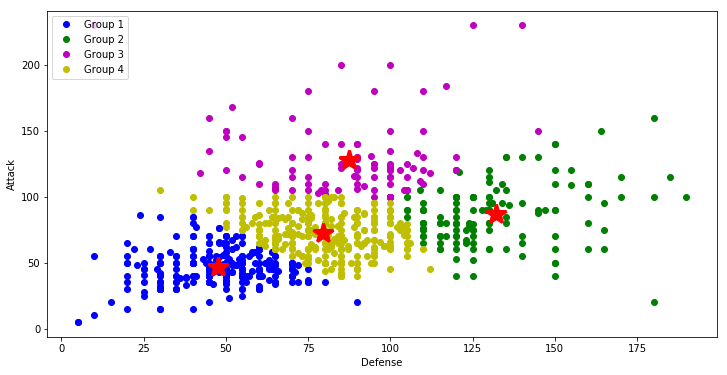

In [13]:
def ClusterKmeansEx(dataframe):     
    f1 = dataframe['Attack'].values
    f2 = dataframe['Defense'].values
    X=np.array(list(zip(f1,f2))).reshape(len(f1),2)
    kmeans = KMeans(n_clusters=4).fit(X)
    x= kmeans.fit_predict(X)
    for i,j in enumerate(dataframe.index):
        dataframe.loc[j,"Group"]=""
        if x[i] == 0:
            dataframe.loc[j,"Group"]="Group 1"
        if x[i] == 1:
            dataframe.loc[j,"Group"]="Group 2"
        if x[i] == 2:
            dataframe.loc[j,"Group"]="Group 3"
        if x[i] == 3:
            dataframe.loc[j,"Group"]="Group 4"
        
            
        
    return dataframe,X,kmeans,x

            
f1 = pokedados['Attack'].values
f2 = pokedados['Defense'].values
X=ClusterKmeansEx(pokedados)[1]
kmeans = ClusterKmeansEx(pokedados)[2]
x= ClusterKmeansEx(pokedados)[3]

plt.figure()
h1,=plt.plot(f1[kmeans.labels_==0],f2[kmeans.labels_==0],'bo')
plt.plot(np.mean(f1[kmeans.labels_==0]),np.mean(f2[kmeans.labels_==0]),'r*',markersize=20,mew=3)
# print centroid 1
print(np.mean(f1[kmeans.labels_==0]),np.mean(f2[kmeans.labels_==0]))

h2,=plt.plot(f1[kmeans.labels_==1],f2[kmeans.labels_==1],'go')
plt.plot(np.mean(f1[kmeans.labels_==1]),np.mean(f2[kmeans.labels_==1]),'r*',markersize=20,mew=3)
# print centroid 2
print(np.mean(f1[kmeans.labels_==1]),np.mean(f2[kmeans.labels_==1]))

h3,=plt.plot(f1[kmeans.labels_==2],f2[kmeans.labels_==2],'mo')
plt.plot(np.mean(f1[kmeans.labels_==2]),np.mean(f2[kmeans.labels_==2]),'r*',markersize=20,mew=3)
# print centroid 3
print(np.mean(f1[kmeans.labels_==2]),np.mean(f2[kmeans.labels_==2]))

h4,=plt.plot(f1[kmeans.labels_==3],f2[kmeans.labels_==3],'yo')
plt.plot(np.mean(f1[kmeans.labels_==3]),np.mean(f2[kmeans.labels_==3]),'r*',markersize=20,mew=3)
# print centroid 4
print(np.mean(f1[kmeans.labels_==3]),np.mean(f2[kmeans.labels_==3]))

plt.ylabel('Attack')
plt.xlabel('Defense')

plt.legend([h1,h2,h3,h4],['Group 1','Group 2','Group 3','Group 4'], loc='upper left')
plt.show()

In [9]:
ClusterKmeansEx(pokedados)[0].head(15)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Group
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,Group 3
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,Group 1
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,Group 1
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,Group 4
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,Group 3
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False,Group 3
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False,Group 1
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False,Group 2
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False,Group 1
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False,Group 3


# Resultados
### Após de executado, podemos perceber que o código separou os pokémons em 4 grupos, os com Attack e Defense baixos, os com stats intermediários, os com ambos os stats altos e os com Attack alto e Defense baixo.
<img src="ex.jpg",width=700,hight=700>

# Observações
### É possível perceber ao analisar os dados que utilizar apenas 2 variáveis, no caso Attack e Defense, não é a melhor opção para um cluster de pokémons, visto que pokémons que tem nível de poder muito diferente acabam aparecendo no mesmo grupo, visto que muitas vezes o poder deles depende de outras variáveis que não aquelas 2 selecionadas. Dessa forma, é possível perceber que para um cluster de pokémons, é necessário analisar todos os 6 stats diferentes para obter uma boa clusterização.

<img src="fail.jpg",width=700,hight=700>

In [3]:
def SetDataFrameType(dataframeN,type1,type2):                   #Retorna um DataFrame com os tipos desejados
    index=[]
    dataframe=dataframeN.fillna("None")
    for i in range(len(dataframe)):
        if type2=="All":
            if dataframe["Type 1"][i]==type1 or dataframe["Type 2"][i]==type1:
                index.append(i)
        if type2=="None":
            if dataframe["Type 1"][i]==type1 and dataframe["Type 2"][i]=="None":
                index.append(i)      
        else:
            if dataframe["Type 1"][i]==type1 and dataframe["Type 2"][i]==type2 or dataframe["Type 1"][i]==type2 and dataframe["Type 2"][i]==type1:
                index.append(i)
    DF=pd.DataFrame()
    DF=dataframe.loc[index,:]
    return DF

def SetDataFrameLegendary(dataframe):                           #Retorna um DataFrame somente com os Pokemons lendarios
    index=[]
    for i in dataframe.index:
        if dataframe["Legendary"][i]==True:
            index.append(i)
    DF=pd.DataFrame()
    DF=dataframe.loc[index,:]
    
    return DF

def Generation(dataframe,gen):                                  #Retorna um DataFrame com os pokemons da geracao escolhida
    DF=dataframe.loc[(dataframe.Generation == gen)]
    
    return DF
    
def ClusterKmeans(dataframe):                                   #Retorna um DataFrame com os Pokemos classificaodos em 4 grupos
    f1 = dataframe['HP'].values
    f2 = dataframe['Attack'].values
    f3 = dataframe['Sp. Atk'].values
    f4 = dataframe['Defense'].values
    f5 = dataframe['Sp. Def'].values
    f6 = dataframe['Speed'].values
    X=np.array(list(zip(f1,f2,f3,f4,f5,f6))).reshape(len(f1),6)
    kmeans = KMeans(n_clusters=4).fit(X)
    x= kmeans.fit_predict(X)
    for i,j in enumerate(dataframe.index):
        dataframe.loc[j,"Group"]=""
        if x[i] == 0:
            dataframe.loc[j,"Group"]="Group 1"
        if x[i] == 1:
            dataframe.loc[j,"Group"]="Group 2"
        if x[i] == 2:
            dataframe.loc[j,"Group"]="Group 3"
        if x[i] == 3:
            dataframe.loc[j,"Group"]="Group 4"
    
    return dataframe,X    

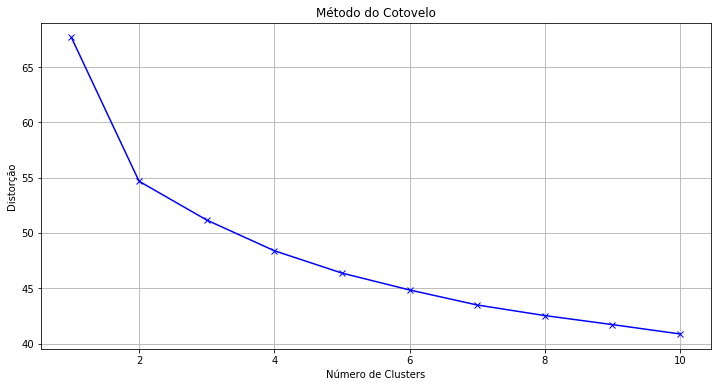

In [4]:
distortions = []
K = range(1,11)
X=(ClusterKmeans(pokedados)[1])
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])


plt.plot(K, distortions, 'bx-')
plt.xlabel('Número de Clusters')
plt.ylabel('Distorção')
plt.grid(True)
plt.title('Método do Cotovelo')
plt.show()
x=ClusterKmeans(pokedados)[0]

In [5]:
Generation(x,1).sort("Group").head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Group
47,42,Golbat,Poison,Flying,455,75,80,70,65,75,90,1,False,Group 1
123,115,Kangaskhan,Normal,NaN,490,105,95,80,40,80,90,1,False,Group 1
58,53,Persian,Normal,NaN,440,65,70,60,65,65,115,1,False,Group 1
56,51,Dugtrio,Ground,NaN,405,35,80,50,50,70,120,1,False,Group 1
126,117,Seadra,Water,NaN,440,55,65,95,95,45,85,1,False,Group 1
54,49,Venomoth,Bug,Poison,450,70,65,60,90,75,90,1,False,Group 1
128,119,Seaking,Water,NaN,450,80,92,65,65,80,68,1,False,Group 1
130,121,Starmie,Water,Psychic,520,60,75,85,100,85,115,1,False,Group 1
60,55,Golduck,Water,NaN,500,80,82,78,95,80,85,1,False,Group 1
50,45,Vileplume,Grass,Poison,490,75,80,85,110,90,50,1,False,Group 1
